# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [81]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

In [10]:
X.shape

(100, 1)

In [11]:
X

array([[ 0.03225343],
       [-0.43717257],
       [-0.14039799],
       [-0.28942671],
       [-1.43048995],
       [-0.86109055],
       [-0.95908022],
       [-0.52824237],
       [-0.18007786],
       [ 1.81894788],
       [-1.50157469],
       [ 1.07524045],
       [-0.53757079],
       [-0.33654744],
       [-0.69333384],
       [ 0.18613021],
       [-0.35285906],
       [-0.59573347],
       [-0.95284841],
       [ 1.37214258],
       [-1.00148098],
       [ 0.59405599],
       [ 1.98893004],
       [-0.84764818],
       [ 0.21276995],
       [-0.86352344],
       [-0.44574656],
       [-1.08669572],
       [ 0.88578638],
       [-0.39457786],
       [-0.75808346],
       [ 0.21445342],
       [-0.91772873],
       [ 1.18192126],
       [-1.23456807],
       [ 1.51028721],
       [ 0.36908201],
       [ 0.07800759],
       [ 0.92827925],
       [ 0.91180261],
       [ 0.50541435],
       [ 0.39476163],
       [-1.40727442],
       [ 1.33682587],
       [ 0.28914398],
       [ 0

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

In [13]:
coef

()

We are fitting a model with an intercept. Lets see what it is.

In [14]:
coef

array(80.88336208)

We can plot the data.

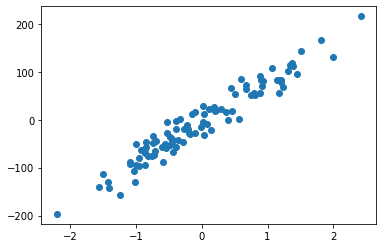

In [82]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [20]:
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)

In [21]:
Xgrid.shape

(1000, 1)

## Fit using sklearn

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([82.90456142]), -3.7092288686703023)

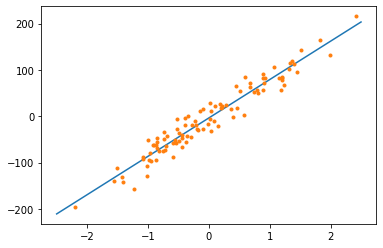

In [24]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [25]:
from sklearn.metrics import r2_score

In [26]:
r2_score(y, lr.predict(X)) #

0.9342344891672815

In [31]:
lr.score(X,y)

0.9342344891672816

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [43]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([ 7, 36, 37, 84, 78, 85, 97, 18, 86, 49, 82,  5, 47, 83,  2, 91, 87,
       87, 50, 62])

In [44]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [45]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)

(0.9623931161060186, 0.9623931161060185)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0.7, 1)

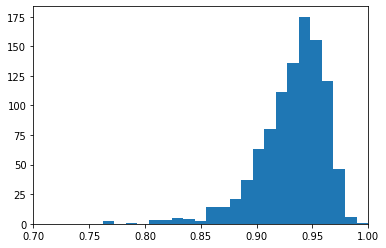

In [51]:
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

In [53]:
scores

[0.9280410597687131,
 0.9119949221932626,
 0.9191795009014617,
 0.894054153388641,
 0.9059046573553835,
 0.9411652345389802,
 0.9360104386885525,
 0.8961563004112889,
 0.950204087945105,
 0.9691694014486603,
 0.9046038457444586,
 0.9091909598513201,
 0.9311171846290793,
 0.9258765638653187,
 0.9602371712552444,
 0.9358773732679349,
 0.9378378823454031,
 0.966739017152079,
 0.9248379260741941,
 0.9294733869268486,
 0.9770423769673132,
 0.9159114492148249,
 0.967229206766424,
 0.8805987517379005,
 0.9532086499862007,
 0.8952979096854032,
 0.960413442085716,
 0.9195181050952913,
 0.9486653238006184,
 0.9194879539412749,
 0.9523977289403425,
 0.8967550266195995,
 0.9457479043325594,
 0.9469570191682394,
 0.9216602070997557,
 0.9141255596033806,
 0.9392792902117567,
 0.9578962645067206,
 0.9622188271666771,
 0.9171473462869753,
 0.9151678354600132,
 0.9474303151577592,
 0.9666657136177996,
 0.9597252428894294,
 0.9625411000015024,
 0.9496140487330356,
 0.9429876840549716,
 0.936910155494476

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

In [76]:
# your code here
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2017,
                       coef=True)

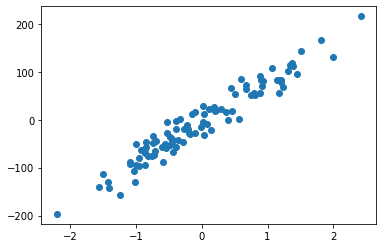

In [77]:
plt.plot(X,y,"o")

In [78]:
# your code here
xgrid = np.linspace(-2.5,2.5,1000)
Xgrid = xgrid.reshape(-1,1)
lr = LinearRegression()
lr.fit(X,y)
ypgrid = lr.predict(Xgrid)
lr.coef_, lr.intercept_

(array([82.90456142]), -3.7092288686703023)

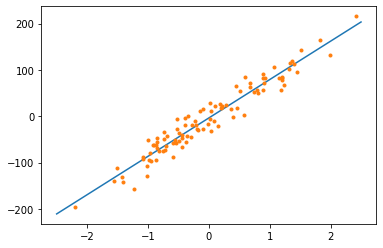

In [79]:
# your code here
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [58]:
# your code here
r2_score(y, lr.predict(X)) 

0.07066243043021647

(0.0, 1)

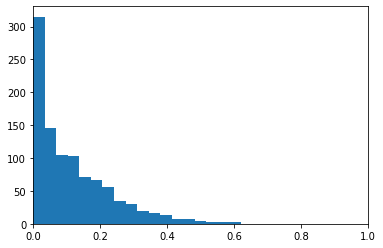

In [67]:
# your code here
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.0, 1, 30))
plt.xlim(0.0,1)

In [70]:
for i in range(5):
    sample_indices = np.random.choice(range(20), size=20, replace=True)
    print(sample_indices)

[ 7  4  3  7  0 19 11 17  4 11  5  5  9  3 12 18 18  8 14  7]
[12  3 19 16  9 10 13  8 10 17  4 14 19  3 11  3 13  3 16 12]
[ 2 15  8  9 17  0 16 19 13  1 19 19  6  2  5 14 15 12 18 18]
[ 1  8  1 18  1  0 17  7  9 13 18 13  0 13  3 11 18  6 16  5]
[16  5  1  3 13  3 19 19  1 16 10  4  5  7 16  5  0  3 17 18]


(0.7, 1)

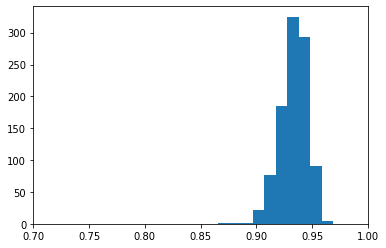

In [80]:
#code here for bootstrap. Remember resample with replacement and size =100(size of original sample)
scores = []
slopes = []
intercept = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=100, replace=True)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [31]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [32]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [67]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

In [68]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

In [69]:
plt.plot(history.history['loss'])

In [70]:
lr3.get_weights()

### Using the Keras Functional API



In [71]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [72]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [73]:
m.get_weights()